In [1]:
fresh_peaches = 'D:\\Fruits\\fresh_peaches_done'
rotten_peaches = 'D:\\Fruits\\rotten_peaches_done'

In [2]:
import os
#os.listdir(rotten_peaches)

In [3]:
import cv2
im = cv2.imread(os.path.join(rotten_peaches,'rotten_peach_1.jpg'))
im = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)
im = cv2.resize(im , (80,80))
print(im)

[[255 255 254 ... 255 255 255]
 [255 255 253 ... 255 255 255]
 [255 252 251 ... 255 255 255]
 ...
 [244 130 254 ... 253 254 255]
 [253 245 253 ... 254 255 255]
 [255 255 255 ... 255 255 255]]


In [30]:
im.shape

(80, 80)

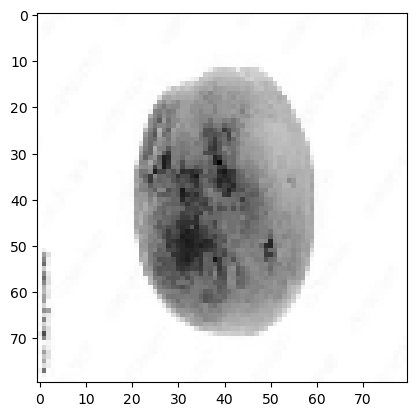

In [31]:
import matplotlib.pyplot as plt
plt.imshow(im,cmap='gray')

In [44]:
features = []
labels=[]
for img in os.listdir(fresh_peaches):
    img_path = os.path.join(fresh_peaches , img)
    im = cv2.imread(img_path)
    im = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im , (80,80))
    features.append(im)
    labels.append(0)


In [45]:
for img in os.listdir(rotten_peaches):
        img_path = os.path.join(rotten_peaches , img)
        im=cv2.imread(img_path)
        im=cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)
        im=cv2.resize(im , (80,80))
        features.append(im)
        labels.append(1) 

In [46]:
import numpy as np
features = np.array(features)
features.shape

(593, 80, 80)

In [47]:
features=features.reshape(593,(80*80))
features.shape

(593, 6400)

In [48]:
labels = np.array(labels)
labels.shape

(593,)

In [49]:
X=features
Y=labels

In [50]:
from keras.utils import to_categorical
Y = to_categorical(Y)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [52]:
xtrain=xtrain/255
xtest=xtest/255
xtrain.shape

(444, 6400)

In [53]:
from keras.models import Sequential
from keras import layers

In [54]:
model=Sequential([
    layers.Dense(64,input_dim=6400,activation='relu'),
    #layers.BatchNormalization(2),
    layers.Flatten(),
    layers.Dense(2,activation='sigmoid'),
    
])

In [55]:
model.compile(loss = 'binary_crossentropy' , optimizer='adam' , metrics = ['accuracy'])

In [56]:
model.fit(xtrain,ytrain,epochs=10 ,batch_size = 20 , validation_data = (xtest,ytest))

Epoch 1/10
23/23 [==============================] - 1s 31ms/step - loss: 1.2843 - accuracy: 0.5203 - val_loss: 0.6838 - val_accuracy: 0.7047
Epoch 2/10
23/23 [==============================] - 0s 18ms/step - loss: 0.7045 - accuracy: 0.6149 - val_loss: 0.7761 - val_accuracy: 0.6980
Epoch 3/10
23/23 [==============================] - 1s 42ms/step - loss: 0.6349 - accuracy: 0.6464 - val_loss: 0.6263 - val_accuracy: 0.7047
Epoch 4/10
23/23 [==============================] - 1s 34ms/step - loss: 0.6218 - accuracy: 0.6554 - val_loss: 0.5901 - val_accuracy: 0.6913
Epoch 5/10
23/23 [==============================] - 1s 29ms/step - loss: 0.6144 - accuracy: 0.6892 - val_loss: 0.5979 - val_accuracy: 0.6644
Epoch 6/10
23/23 [==============================] - 1s 41ms/step - loss: 0.5956 - accuracy: 0.6712 - val_loss: 0.6459 - val_accuracy: 0.6644
Epoch 7/10
23/23 [==============================] - 1s 34ms/step - loss: 0.6761 - accuracy: 0.6059 - val_loss: 0.6919 - val_accuracy: 0.6242
Epoch 8/10
23

In [57]:
predict=model.predict(xtest)

5/5 [==============================] - 0s 3ms/step


In [90]:
def check(x):
    if predict[x][0]>predict[x][1]:
        return 'FRESH'
    else:
        return 'ROTTEN'

In [103]:
print(check(2))

FRESH


In [104]:
ytest[2]

array([1., 0.], dtype=float32)

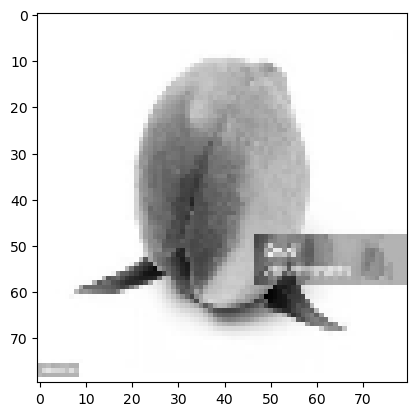

In [105]:
plt.imshow(xtest[2].reshape(80,80),cmap='gray')

In [106]:
print(check(112))

ROTTEN


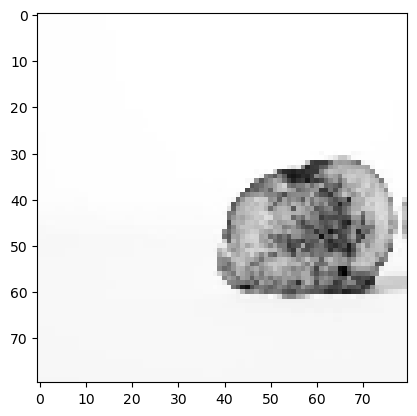

In [107]:
plt.imshow(xtest[112].reshape(80,80),cmap='gray')

In [108]:
model.save('fresh,rotten')

INFO:tensorflow:Assets written to: fresh,rotten\assets


In [110]:
import keras
x=keras.models.load_model('fresh,rotten')

In [113]:
x.fit(xtrain,ytrain,epochs=1)

14/14 [==============================] - 1s 34ms/step - loss: 0.8158 - accuracy: 0.6104
